# Extract Limbus Config Settings
The Limbus config file is saved in the .pkl format.  This scripts extracts the 
settings tables from the config file, formats them and saves them to an Excel 
spreadsheet for easy off-line reference.  Error checking is not performed.

## Imports

In [1]:
from typing import Any, Dict, List
import pickle
import re
from pathlib import Path
from pprint import pprint

import numpy as np
import pandas as pd
import xlwings as xw

## Utility Functions

### Print only beginning and end of a long list

In [2]:
def limited_print(print_list: List[str], n :int = 3, 
                  use_compact :bool = True, **kwargs):
    '''Print only the first and last `n` items in the list.

    Adds ellipsis (...) between first and last group.
    If liet length is <= 2xn, the whole list is printed

    Args:
        print_list (List[str]): The list to be printed
        n (int, optional): The number of items at the beginning and end to 
            include. Defaults to 3.
        use_compact (bool, optional): If True print in compact mode. 
            Defaults to True.
        **kwargs: Additional keyword arguments are passed directly to pprint.
    '''
    if len(print_list) > 2*n:
        start_list = print_list[:n]
        end_list = print_list[-n:]
        pprint(start_list, compact=use_compact, **kwargs)
        print('...')
        pprint(end_list, compact=use_compact, **kwargs)        
    else:
        pprint(print_list, compact=use_compact, **kwargs)
    

### Convert a list to a string for displaying in Excel

In [3]:
def list_to_str(structure_list: List[str])->str:
    '''Convert a list of strings to a string representation.
    
    This is meant to work like the __repr__() function for a list of strings, 
    but it needs to be applied to a Pandas.DataFrame column.

    Args:
        structure_list (List[str]): List of structure names

    Returns:
        str: string representation of the list.
    '''
    structure_str = '['
    for structure in structure_list:
        structure_str = structure_str + str(structure) + ', '
    if len(structure_str) > 1:
        structure_str = structure_str[0:-2] + ']'
    else:
        structure_str = structure_str + ']'
    return structure_str

### Invert a boolean

In [4]:
def invert(b: bool)->bool:
    '''Return the opposite boolean value.

    This method is required because the `not()` function cannot be directly 
    applied to a Pandas.DataFrame column.

    Args:
        b (bool): boolean value to be inverted

    Returns:
        bool: inverted boolean value
    '''
    return not(bool(b))

## I/O Functions

### Save the settings tables in an excel workbook

In [5]:
def save_tables(save_file: Path, 
                config_table: Dict[str, pd.DataFrame])-> xw.Book:
    '''Save each table into an Excel sheet.

    Each table in the `config_table` dictionary is saved to an Excel worksheet 
    with the name of the sheet being corresponding the dictionary item key.

    Args:
        save_file (Path): The name of the file to save the spreadsheet in.  If 
            it already exists it will be overwritten without warning.
        config_table (Dict[str, pd.DataFrame]): The tables to be saved. 
    '''
    wb = xw.Book()
    wb.save(save_file)
    
    for table_name, table in config_table.items():
        sheet = wb.sheets.add(table_name)
        xw.view(table, sheet=sheet)
    wb.save(save_file)
    return wb

### Load the Settings file

In [6]:
def load_settings(settings_file_path: Path)->Dict[str, Any]:
    '''Load the configuration.pkl file.

    Args:
        settings_file_path (Path): The path to the file.

    Returns:
        Dict[str, Any]: _description_
    '''
    settings_file = open(settings_file_path, mode='rb')
    settings_data = pickle.load(settings_file)
    settings_file.close()
    return settings_data


## File Paths

In [7]:
# Selects one level up from the current working directory as the starting point.
base_path = Path.cwd() / '..'
base_path = base_path.resolve()

settings_path = base_path / 'Config and settings files' / 'V1.7'
file_name = 'contour_settings.pkl'
settings_file_path = settings_path / file_name

save_file = settings_path / 'limbus_settings.xlsx'


## Exploring Configuration Settings

In [8]:
settings_data = load_settings(settings_file_path)

### Top level dictionary
The top level dictionary in the `contour_settings.pkl` file contains the 
following items:

In [9]:
for key in settings_data.keys():
    print(f'{key:42s}\t{type(settings_data[key])}')


archive_bad_imports                       	<class 'str'>
automatic_import_directory                	<class 'str'>
automatic_export_directory                	<class 'str'>
automatic_import_wait_timer               	<class 'int'>
subdivide_export_directory                	<class 'str'>
subdivide_export_directory_tag            	<class 'str'>
delete_from_archive_after                 	<class 'str'>
enable_rt_roi_identification_code_sequence	<class 'str'>
enable_empty_rt_roi_interpreted_type      	<class 'str'>
enable_TG263_partial_structure_detection  	<class 'str'>
read_images_forcefully                    	<class 'str'>
include_empty_contours                    	<class 'str'>
rt_roi_context_identifier                 	<class 'str'>
rt_roi_mapping_resource                   	<class 'str'>
rt_roi_context_group_version              	<class 'str'>
enable_logging                            	<class 'str'>
enable_notifications                      	<class 'str'>
empty_structures               

#### Summary of data in the top level dictionary.  
- Descriptions are based in information in the user manual
- Sub-dictionaries are described in more detail later.
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hp5m{background-color:#d8ffc4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-attk{background-color:#efefef;border-color:inherit;color:#000000;text-align:left;vertical-align:top}

.tg .tg-v17{background-color:#ffe4c4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-20nk{background-color:#f8ff8a;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-4efy{background-color:#ffffff;border-color:inherit;color:#000000;font-family:"Arial Black", Gadget, sans-serif !important;
  font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-jqhc{background-color:#f8ff8a;border-color:inherit;color:#000000;text-align:left;vertical-align:middle}
.tg .tg-8e4m{background-color:#dbc8fd;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-5syk{background-color:#caedf8;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-oya7{background-color:#fbc3c3;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-j36g{background-color:#efefef;border-color:inherit;color:#000000;text-align:left;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4efy">Item</th>
    <th class="tg-4efy">Type</th>
    <th class="tg-4efy">Value Option</th>
    <th class="tg-4efy">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-hp5m">automatic_import_directory</td>
    <td class="tg-hp5m">string</td>
    <td class="tg-hp5m">Valid UNC path</td>
    <td class="tg-hp5m">Filesystem folder / path to import DICOM image files</td>
  </tr>
  <tr>
    <td class="tg-hp5m">automatic_import_wait_timer</td>
    <td class="tg-hp5m">string</td>
    <td class="tg-hp5m">• 10 seconds<br>• 30 seconds<br>• 60 seconds<br>• 90 seconds<br>• 120 seconds</td>
    <td class="tg-hp5m">Delay time between when images in a new DICOM series are detected in the Automatic DICOM Import Folder and when the image series is imported into the <br>application.</td>
  </tr>
  <tr>
    <td class="tg-hp5m">read_images_forcefully</td>
    <td class="tg-hp5m">string</td>
    <td class="tg-hp5m">True<br>False</td>
    <td class="tg-hp5m">If enabled, Limbus Contour will force-read / import DICOM files that are missing DCIM header information.</td>
  </tr>
  <tr>
    <td class="tg-5syk">archive_bad_imports</td>
    <td class="tg-5syk">string</td>
    <td class="tg-5syk">True<br>False</td>
    <td class="tg-5syk">Cause unsupported DICOM files to be moved to the ‘COULD_NOT_IMPORT’ subfolder of the Archive folder.<br></td>
  </tr>
  <tr>
    <td class="tg-5syk">delete_from_archive_after</td>
    <td class="tg-5syk">string</td>
    <td class="tg-5syk">• Never<br>• 1 Day<br>• 3 Days<br>• 1 Week<br>• 2 Weeks<br>• 1 Month<br>• 3 Months<br>• 6 Months</td>
    <td class="tg-5syk">Delete files from Archive folder that are older than the date specified by this setting. </td>
  </tr>
  <tr>
    <td class="tg-8e4m">automatic_export_directory</td>
    <td class="tg-8e4m">string</td>
    <td class="tg-8e4m">Valid UNC path</td>
    <td class="tg-8e4m">Filesystem folder / path to export segmented RT-Struct files in the Automatic workflow. </td>
  </tr>
  <tr>
    <td class="tg-8e4m">subdivide_export_directory</td>
    <td class="tg-8e4m">string</td>
    <td class="tg-8e4m">True<br>False</td>
    <td class="tg-8e4m">If enabled, exported DICOM RT-Structure Set files will be organized in sub-folders of the Automatic DICOM RT-Struct Export Folder.</td>
  </tr>
  <tr>
    <td class="tg-8e4m">subdivide_export_directory_tag</td>
    <td class="tg-8e4m">string</td>
    <td class="tg-8e4m">InstitutionName</td>
    <td class="tg-8e4m">The tag to use for organizing the sub-folders.  Currently only InstitutionName (0008,0080) is available.</td>
  </tr>
  <tr>
    <td class="tg-v17">include_empty_contours</td>
    <td class="tg-v17">string</td>
    <td class="tg-v17">True<br>False</td>
    <td class="tg-v17"><i> New in Version 1.7</i><br>
      If enabled, structures selected for contouring that Limbus is unable to generate will be included in the DICOM RT-Structure Set file as an Empty Structure</td>
  </tr>
  <tr>
    <td class="tg-v17">enable_TG263_partial_structure_detection</td>
    <td class="tg-v17">string</td>
    <td class="tg-v17">True<br>False</td>
    <td class="tg-v17"><i> New in Version 1.7</i><br>
      If enabled, structures where only part of the total volume is included in the image set, automatically have "<b>~</b>" added to the structure name (Following TG263 standards).</td>
  </tr>
  <tr>
    <td class="tg-20nk">enable_empty_rt_roi_interpreted_type</td>
    <td class="tg-20nk">string</td>
    <td class="tg-20nk">True<br>False</td>
    <td class="tg-20nk">If enabled exported DICOM RT-Structure Set files will have the RT ROI Interpreted Type (3006,00A4) tag set empty.</td>
  </tr>
  <tr>
    <td class="tg-20nk">enable_rt_roi_identification_code_sequence</td>
    <td class="tg-20nk">string</td>
    <td class="tg-20nk">True<br>False</td>
    <td class="tg-20nk">If enabled the RT ROI Identification Code Sequence attributes will be written to exported DICOM RT-Structure Set files using the values configured for Structures and Empty Structures (Code Value, Code Meaning, Code Scheme Designator).</td>
  </tr>
  <tr>
    <td class="tg-20nk">rt_roi_mapping_resource</td>
    <td class="tg-20nk">string</td>
    <td class="tg-20nk"></td>
    <td class="tg-jqhc" rowspan="3">The required context information for the ROI identification Codes.  <a href="http://dicom.nema.org/medical/dicom/2016c/output/chtml/part03/sect_8.8.html#table_8.8-1b" target="_blank" rel="noopener noreferrer">NEMA DICOM Reference table 8.8-1b</a></td>
  </tr>
  <tr>
    <td class="tg-20nk">rt_roi_context_identifier</td>
    <td class="tg-20nk">string</td>
    <td class="tg-20nk"></td>
  </tr>
  <tr>
    <td class="tg-20nk">rt_roi_context_group_version</td>
    <td class="tg-20nk">string</td>
    <td class="tg-20nk"></td>
  </tr>
  <tr>
    <td class="tg-oya7">enable_logging</td>
    <td class="tg-oya7">string</td>
    <td class="tg-oya7">True<br>False</td>
    <td class="tg-oya7"></td>
  </tr>
  <tr>
    <td class="tg-oya7">enable_notifications</td>
    <td class="tg-oya7">string</td>
    <td class="tg-oya7">True<br>False</td>
    <td class="tg-oya7">If enabled, show an OS level notification indicating when an Image Series has completed contouring</td>
  </tr>
  <tr>
    <td class="tg-attk">structure_settings</td>
    <td class="tg-attk">dictionary</td>
    <td class="tg-attk"></td>
    <td class="tg-j36g" rowspan="4">See Below</td>
  </tr>
  <tr>
    <td class="tg-attk">empty_structures</td>
    <td class="tg-attk">dictionary</td>
    <td class="tg-attk"></td>
  </tr>
  <tr>
    <td class="tg-attk">structure_templates</td>
    <td class="tg-attk">dictionary</td>
    <td class="tg-attk"></td>
  </tr>
  <tr>
    <td class="tg-attk">metadata_import_rules</td>
    <td class="tg-attk">dictionary</td>
    <td class="tg-attk"></td>
  </tr>
</tbody>
</table>

**NOTE:** The location of the Log warnings/errors file is not saved in the 
settings file.

### The `structure_settings` dictionary

In [10]:
struct_dict = settings_data['structure_settings']
limited_print(list(struct_dict.keys()),n=10)

['ANAL_CANAL', 'ANAL_CANAL_FEMALE', 'AORTA', 'AORTA_LOWER', 'BLADDER',
 'BLADDER_FEMALE', 'BLADDER_MRI', 'BODY', 'BODY_HN_EXPAND',
 'BODY_HN_LESS_POST']
...
['SVC', 'SV_MRI', 'THYROID', 'TRACHEA', 'TRACHEAREF', 'UTEROCERVIX',
 'UTEROCERVIX_RAW', 'VAGINA', 'VAGINA_RAW', 'VAGINA_UTEROCERVIX_COMBINE']


In [11]:
column_names = []
for struct in struct_dict.values():
    for key in struct.keys():
        column_name = tuple([key, type(struct[key])])
        column_names.append(column_name)
column_names = set(column_names)
for column in column_names:
    print(f'{column[0]:42s}\t{column[1]}')

default_name                              	<class 'str'>
nth_slice_gap                             	<class 'int'>
default_code_value                        	<class 'str'>
default_rt_roi_interpreted_type           	<class 'str'>
default_code_scheme                       	<class 'str'>
contour_every_nth_slice                   	<class 'bool'>
default_code_meaning                      	<class 'str'>
hide_from_user                            	<class 'bool'>
default_color                             	<class 'list'>
template_specific_config                  	<class 'dict'>


The structure_settings dictionary is organized with entries for each limbus 
structure model.

Each model item contains a sub-dictionary with template specific settings.
The template specific settings are not necessarily present for every template 
and every structure.   They are relevant only where the settings are 
different from the default settings.

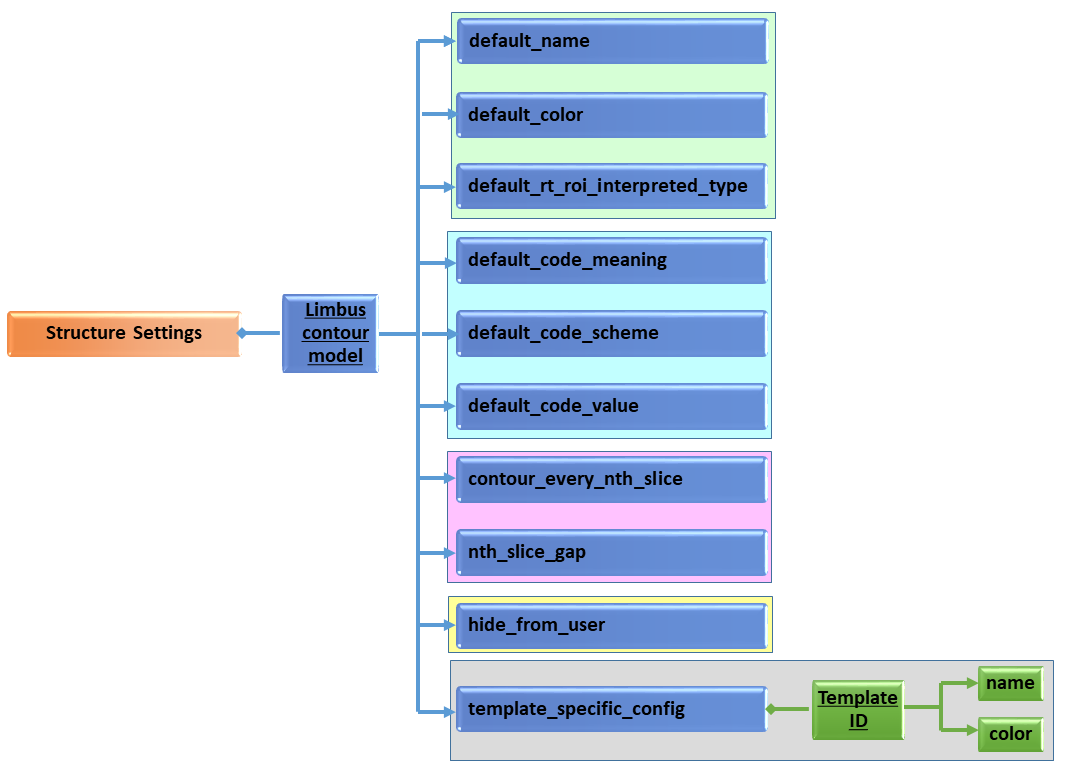

For output the structure settings are converted to a Pandas DataFrame.  The column headings are renamed for easier reading and some formatting is done to make it compatible with Excel.

In addition, the `contour_every_nth_slice` and `hide_from_user` boolean values 
are inverted to `ContourEverySlice` and `Active` respectively based on my 
personal viewing preference.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hp5m{background-color:#d8ffc4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-attk{background-color:#efefef;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-20nk{background-color:#f8ff8a;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-4efy{background-color:#ffffff;border-color:inherit;color:#000000;font-family:"Arial Black", Gadget, sans-serif !important;
  font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-8e4m{background-color:#dbc8fd;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-5syk{background-color:#caedf8;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-j36g{background-color:#efefef;border-color:inherit;color:#000000;text-align:left;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4efy">Item</th>
    <th class="tg-4efy">Type</th>
    <th class="tg-4efy">Excel Table Column</th>
    <th class="tg-4efy">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-hp5m">DICTIONARY KEY</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">LimbusModel</td>
    <td class="tg-hp5m">The Limbus contour model. (Table Index)</td>
  </tr>
  <tr>
    <td class="tg-hp5m">default_name</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">StructureId</td>
    <td class="tg-hp5m">The Default Name of structure – as the structure will be labelled in generated DICOM RT-Struct files (ROIName Tag).</td>
  </tr>
  <tr>
    <td class="tg-hp5m">default_color</td>
    <td class="tg-hp5m">list <br><span style="font-weight:bold">Converted to String representation of an RGB triplet.</span> <br>e.g. `[233, 165, 255]`.</td>
    <td class="tg-hp5m">Color</td>
    <td class="tg-hp5m">Default colour for the struct in RGB.</td>
  </tr>
  <tr>
    <td class="tg-hp5m">default_rt_roi_interpreted_type</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">StructureType</td>
    <td class="tg-hp5m">RT ROI Interpreted Type Tag (3006,00A4) for the structure.<br>Possible types are:<br>• ORGAN<br>• EXTERNAL<br>• PTV<br>• CTV<br>• GTV<br>• TREÄTED_VOLUME<br>• IRRAD_VOLUME<br>• BOLUS<br>• AVOIDANCE<br>• MARKER<br>• REGISTRATION<br>• ISOCENTER<br>• CONTRAST_AGENT<br>• CAVITY<br>• SUPPORT<br>• FIXATION<br>• DOSE_REGION<br>• CONTROL<br>• DOSE_MEASUREMENT<br></td>
  </tr>
  <tr>
    <td class="tg-5syk">default_code_meaning</td>
    <td class="tg-5syk">str</td>
    <td class="tg-5syk">CodeMeaning</td>
    <td class="tg-5syk">RT ROI Identification Code Sequence “Code Meaning” (0008,0104) for the structure.</td>
  </tr>
  <tr>
    <td class="tg-5syk">default_code_value</td>
    <td class="tg-5syk">str</td>
    <td class="tg-5syk">CodeValue</td>
    <td class="tg-5syk">RT ROI Identification Code Sequence “Code Value” (0008,0100) for the structure. <br>Structures are by default populated with Foundational Model of Anatomy (FMA) codes.</td>
  </tr>
  <tr>
    <td class="tg-5syk">default_code_scheme</td>
    <td class="tg-5syk">str</td>
    <td class="tg-5syk">CodeScheme</td>
    <td class="tg-5syk">RT ROI Identification Code Sequence “Code Scheme Designator” (0008,0102) for the structure.<br><a href="http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_8.8.html" target="_blank" rel="noopener noreferrer">NEMA DICOM section 8.8</a></td>
  </tr>
  <tr>
    <td class="tg-8e4m">contour_every_nth_slice</td>
    <td class="tg-8e4m">bool <br><span style="font-weight:bold">Inverted for table</span></td>
    <td class="tg-8e4m">ContourEverySlice</td>
    <td class="tg-8e4m">Export the associated structure to DICOM RT-Struct with only every nth slice contoured, where n is SliceSpacing.</td>
  </tr>
  <tr>
    <td class="tg-8e4m">nth_slice_gap</td>
    <td class="tg-8e4m">int</td>
    <td class="tg-8e4m">SliceSpacing</td>
    <td class="tg-8e4m">The contour slice spacing if ContourEverySlice is False<br>Options are:<br>• every slice<br>• every 2nd slice<br>• every 3rd slice<br>• every 4th slice</td>
  </tr>
  <tr>
    <td class="tg-20nk">hide_from_user</td>
    <td class="tg-20nk">bool <br><span style="font-weight:bold">Inverted for table</span></td>
    <td class="tg-20nk">Active</td>
    <td class="tg-20nk">If True, the structure model will be available to be applied to image sets and assigned to templates.</td>
  </tr>
  <tr>
    <td class="tg-attk">template_specific_config</td>
    <td class="tg-j36g">dictionary</td>
    <td class="tg-attk"></td>
    <td class="tg-j36g">See Below</td>
  </tr>
</tbody>
</table>

**Note:** The Settings export does not contain the modality for the model (CT or MR).

### The `empty_structures` dictionary
Empty structures are defined as 
*Placeholder structures to be included in the DICOM RT-Struct file without any 
contour data*.

The `empty_structures` dictionary is identical to the `structure_settings` 
dictionary except missing the following fields:
- hide_from_user
- contour_every_nth_slice
- nth_slice_gap

In [12]:
mt_struct = settings_data['empty_structures']
column_names = []
for struct in mt_struct.values():
    for key in struct.keys():
        column_name = tuple([key, type(struct[key])])
        column_names.append(column_name)
column_names = set(column_names)
for column in column_names:
    print(f'{column[0]:42s}\t{column[1]}')

default_name                              	<class 'str'>
default_code_value                        	<class 'str'>
default_rt_roi_interpreted_type           	<class 'str'>
default_code_scheme                       	<class 'str'>
default_code_meaning                      	<class 'str'>
default_color                             	<class 'list'>
template_specific_config                  	<class 'dict'>


### The `structure_templates` dictionary
Structure Templates are defined as 
*Groupings of structures that can be assigned to an image series, 
usually based on treatment sites*.

In [13]:
templ_dict = settings_data['structure_templates']
pprint(list(templ_dict.keys()), compact=True)

['Abdomen', 'Brain', 'Breast Left', 'Breast Right', 'Breast Unspecified',
 'CNS MRI', 'Head-Neck', 'Lung', 'Pelvis', 'Prostate', 'Spine']


In [14]:
column_names = []
for templ in templ_dict.values():
    for key in templ.keys():
        column_name = tuple([key, type(templ[key])])
        column_names.append(column_name)
column_names = set(column_names)
for column in column_names:
    print(f'{column[0]:42s}\t{column[1]}')

empty_structures                          	<class 'list'>
display_color                             	<class 'tuple'>
structures                                	<class 'list'>
structure_set_label                       	<class 'str'>


The primary content of the structure_templates dictionaries are two lists of 
structures to be included in the template:
1. Limbus Structure models
2. Empty structures

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hp5m{background-color:#d8ffc4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-4efy{background-color:#ffffff;border-color:inherit;color:#000000;font-family:"Arial Black", Gadget, sans-serif !important;
  font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-5syk{background-color:#caedf8;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4efy">Item</th>
    <th class="tg-4efy">Type</th>
    <th class="tg-4efy">Excel Table Column</th>
    <th class="tg-4efy">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-hp5m">DICTIONARY KEY</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">TemplateID</td>
    <td class="tg-hp5m">The name of the Limbus structure template (Table Index)</td>
  </tr>
  <tr>
    <td class="tg-hp5m">display_color</td>
    <td class="tg-hp5m">tuple <br><span style="font-weight:bold">Converted to String representation of an RGB triplet</span>.<br>e.g. `[233, 165, 255]`.</td>
    <td class="tg-hp5m">TemplateColor</td>
    <td class="tg-hp5m">The color used for the template in the Limbus settings and logging windows.</td>
  </tr>
  <tr>
    <td class="tg-hp5m">structure_set_label</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">StructureSetLabel</td>
    <td class="tg-hp5m">The name given to the Structure Set in the DICOM RT-Struct file</td>
  </tr>
  <tr>
    <td class="tg-5syk">structures</td>
    <td class="tg-5syk">List[str]<br><span style="font-weight:bold">Converted to String representation of a list of strings</span></td>
    <td class="tg-5syk">TemplateStructures</td>
    <td class="tg-5syk">A list of the Limbus Structure Models to include in the template.</td>
  </tr>
  <tr>
    <td class="tg-5syk">empty_structures</td>
    <td class="tg-5syk">List[str] <br><span style="font-weight:bold">Converted to String representation of a list of strings</span></td>
    <td class="tg-5syk">EmptyStructures</td>
    <td class="tg-5syk">A list of Empty Structure IDs to include in the template.</td>
  </tr>
</tbody>
</table>

### Template Structures
*Specific settings for the structures included in each template.*

In order to obtain the specific settings for a structure in a given template, 
the information in the `structure_templates` and in the `structure_settings` 
dictionaries must be combined. 

In the `structure_settings` dictionary, each model item contains a 
sub-dictionary with template specific settings.  The template specific settings 
entry are not necessarily present for all structures in the template. A complete 
list of the settings for each structure in a template is obtained by using the 
list of structure for the template obtained from `structure_templates` and 
adding the default settings for any structure in the list which does not have 
template specific settings.

The same process is also applied to the list of empty structures.

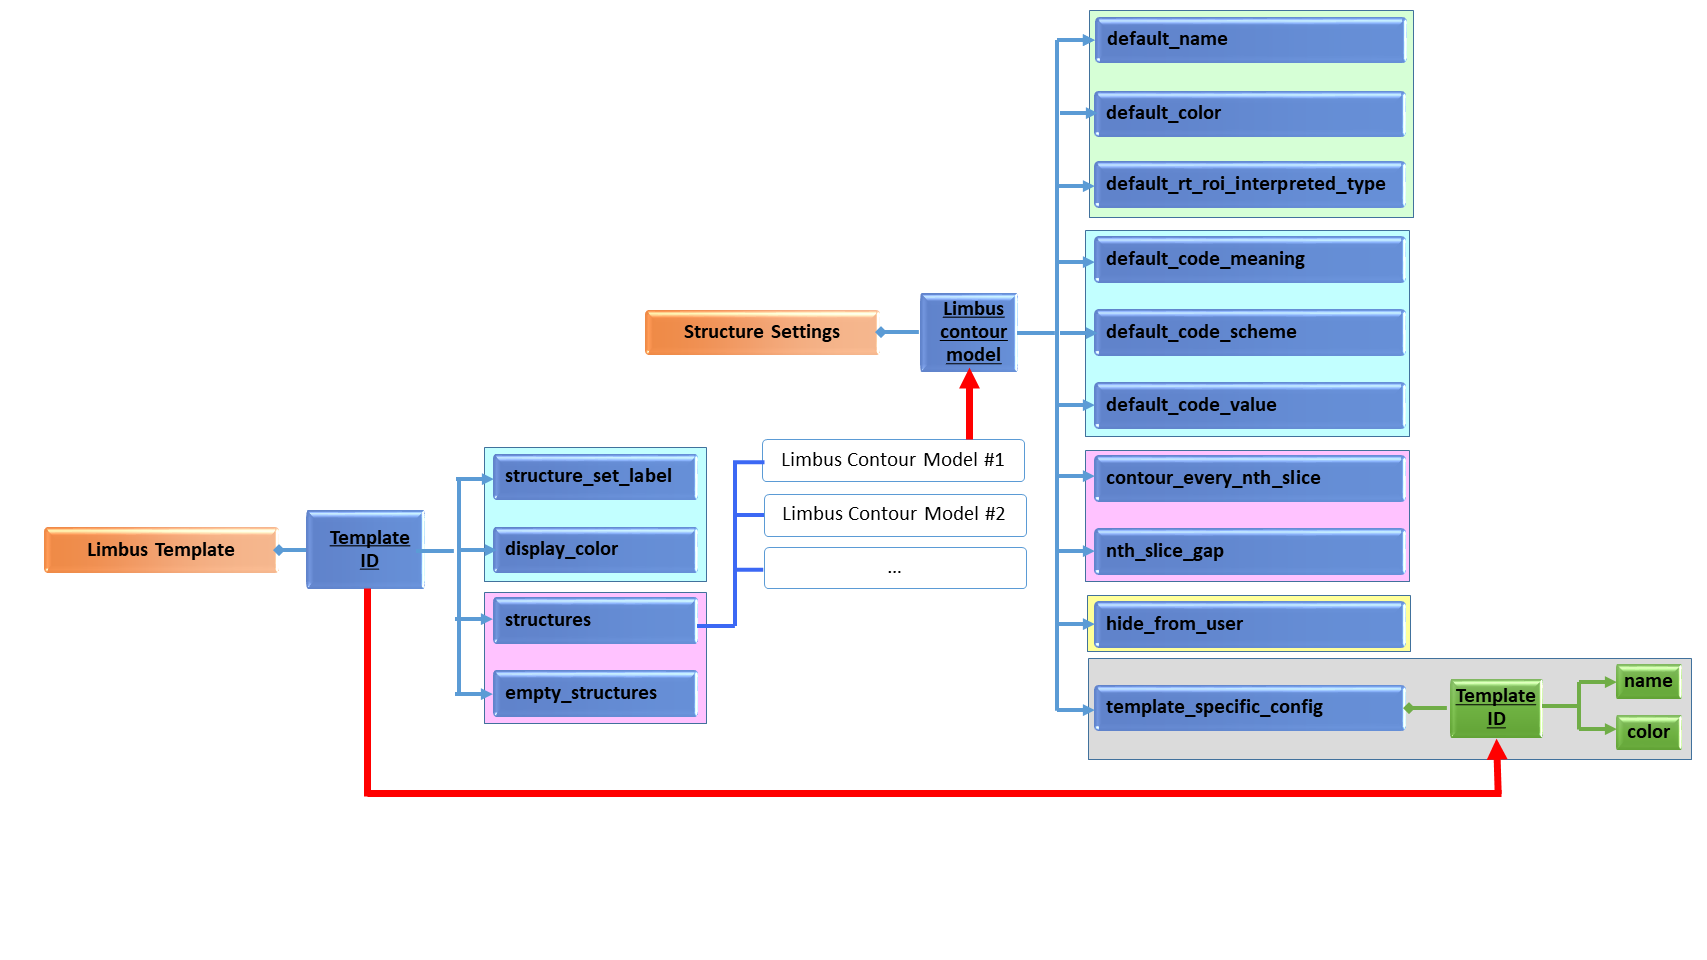

In [15]:
template_ref = []
for name, struct in struct_dict.items():
    tmpl_cfg = struct.get('template_specific_config')
    if tmpl_cfg:
        template_ref.append([name, list(tmpl_cfg.keys())])
limited_print(template_ref, n=3, use_compact=False, width=90)

[['AORTA', ['Lung']],
 ['BLADDER', ['Pelvis', 'Prostate']],
 ['BOWEL', ['Abdomen', 'Pelvis', 'Spine']]]
...
[['SVC', ['Head-Neck', 'Lung']],
 ['THYROID', ['Breast Left', 'Breast Right', 'Breast Unspecified', 'Head-Neck']],
 ['TRACHEA', ['Lung', 'Spine']]]


**Template Structures Table**
- Identical to the Structure Settings Table except:
  - Missing "Active" (hide_from_user) field:
  - Added "EmptyStructure" field.

### The `metadata_import_rules` dictionary

*Import Rules automatically apply the appropriate template to an imported DICOM 
image series based on DICOM image metadata. Rules cal also be used to ignore an 
imported DICOM image series.*


In [16]:
imprt_dict = settings_data['metadata_import_rules']
pprint(list(imprt_dict.keys()), compact=True)

['4D-AVE', '4D-Phase', 'Abdomen', 'Breast Laterality Not Specified',
 'Breast Left', 'Breast Right', 'CNS & FSRT', 'CNS MR', 'Chest', 'Head & Neck',
 'Pelvis', 'Prostate', 'Skip Rectal Volume', 'Spine']


#### Items in the `metadata_import_rules` dictionary

In [17]:
column_names = []
for rule in imprt_dict.values():
    for key in rule.keys():
        column_name = tuple([key, type(rule[key])])
        column_names.append(column_name)
column_names = set(column_names)
for column in column_names:
    print(f'{column[0]:20s}\t{column[1]}')

rule_name           	<class 'str'>
enabled             	<class 'bool'>
individual_rules    	<class 'list'>
rule_priority       	<class 'int'>
template_name       	<class 'str'>
case_sensitive      	<class 'bool'>
comparator          	<class 'str'>
do_not_import       	<class 'bool'>


#### Items in the `individual_rules` list

In [18]:
conditions_list = []
for name, rule in imprt_dict.items():
    for test in rule['individual_rules']:
        conditions_list.append(
            f'{name:31s} {test[0]:30s} {test[1]:16s} {test[2]:13}'
            )
limited_print(conditions_list, n=3, use_compact=False, width=180)

['4D-AVE                          Series Description (0008,103e) Contains         AVE          ',
 '4D-AVE                          Series Description (0008,103e) Contains         MIP          ',
 '4D-Phase                        Series Description (0008,103e) Contains         Gated        ']
...
['Prostate                        Series Description (0008,103e) Contains         PROSTATE     ',
 'Skip Rectal Volume              Series Description (0008,103e) Contains         Rectal Volume',
 'Spine                           Series Description (0008,103e) Contains         Spine        ']


#### Rules Table
- The keys of the dictionary are the names of the import rules.
- The `individual_rules` item is a list that contains tuples of conditions 
  (test parameters).
- In the Excel table each individual condition becomes a row.

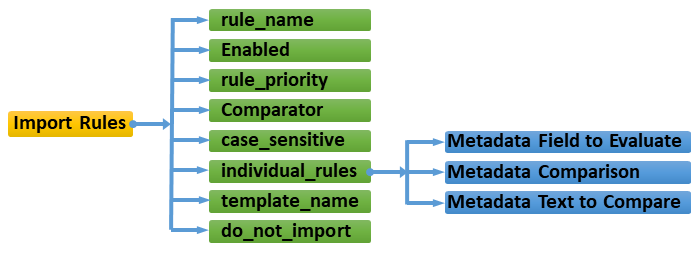


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hp5m{background-color:#d8ffc4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-4efy{background-color:#ffffff;border-color:inherit;color:#000000;font-family:"Arial Black", Gadget, sans-serif !important;
  font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-8e4m{background-color:#dbc8fd;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-5syk{background-color:#caedf8;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-o4ax{background-color:#dbc8fd;border-color:inherit;color:#000000;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4efy">Item</th>
    <th class="tg-4efy">Type</th>
    <th class="tg-4efy">Excel Table Column</th>
    <th class="tg-4efy">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-hp5m">rule_name</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">Rule</td>
    <td class="tg-hp5m">A unique name for the import Rule, describing its purpose.</td>
  </tr>
  <tr>
    <td class="tg-hp5m">enabled</td>
    <td class="tg-hp5m">bool</td>
    <td class="tg-hp5m">Active</td>
    <td class="tg-hp5m">Determines if the rule is enabled.</td>
  </tr>
  <tr>
    <td class="tg-hp5m">rule_priority</td>
    <td class="tg-hp5m">int</td>
    <td class="tg-hp5m">Order</td>
    <td class="tg-hp5m">Defines the order that Rules are applied to a series.<br>
      Decimal place values indicate the order of the rule conditions.</td>
  </tr>
  <tr>
    <td class="tg-5syk">comparator</td>
    <td class="tg-5syk">str</td>
    <td class="tg-5syk">Logic</td>
    <td class="tg-5syk">Logic used to combine multiple Rule Conditions.<br>
      One of:
      <ul>
        <li>Any</li>
        <li>All</li>
        </ul></td>
  </tr>
  <tr>
    <td class="tg-5syk">case_sensitive</td>
    <td class="tg-5syk">bool</td>
    <td class="tg-5syk">CaseSensitive</td>
    <td class="tg-5syk">If True, series metadata text comparisons are case sensitive,<br>
      otherwise text comparisons are case insensitive.</td>
  </tr>
  <tr>
    <td class="tg-5syk">individual_rules</td>
    <td class="tg-5syk">List[Tuple[str]]</td>
    <td class="tg-5syk">Field,<br>Comparison,<br>Text</td>
    <td class="tg-5syk">Define conditions that trigger the Rule.<br>
      <span style="font-weight:bold">Each item in the list contributes a row.</span>
      <br>See below for more detail.</td>
  </tr>
  <tr>
    <td class="tg-8e4m">do_not_import</td>
    <td class="tg-8e4m">bool</td>
    <td class="tg-8e4m"></td>
    <td class="tg-o4ax">Used to modify 
      <span style="font-style:italic">SelectTemplate</span></td>
  </tr>
  <tr>
    <td class="tg-8e4m">template_name</td>
    <td class="tg-8e4m">str</td>
    <td class="tg-8e4m">SelectTemplate</td>
    <td class="tg-8e4m">Either the name of the Limbus template to apply,<br>
    or the phrase "DO NOT IMPORT"</td>
  </tr>
</tbody>
</table>

**Conditions tuple**
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-hp5m{background-color:#d8ffc4;border-color:inherit;color:#000000;text-align:left;vertical-align:top}
.tg .tg-4efy{background-color:#ffffff;border-color:inherit;color:#000000;font-family:"Arial Black", Gadget, sans-serif !important;
  font-weight:bold;text-align:left;vertical-align:top}
.tg2 td{border-style: none;padding:0px 3px 0px 10px;font-weight:normal;background-color:inherit}
.tg2 .tg-em  {border-style: none;font-weight:bold;background-color:#dbc8fd}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4efy">Item</th>
    <th class="tg-4efy">Type</th>
    <th class="tg-4efy">Excel Table Column</th>
    <th class="tg-4efy">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-hp5m">Metadata Field to Evaluate</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">Field</td>
    <td class="tg-hp5m">DICOM tag in the series (or other metadata) to compare against.<br>
      Possible values are:<br>
      <table class="tg2">
        <tr><td>Series Description</td><td>(0008,103e)</td><tr>
        <tr><td>Study Description</td><td>(0008,1030)</td><tr>
        <tr><td>Modality</td><td>(0008,0060)</td><tr>
        <tr><td>Patient Sex</td><td>(0010,0040)</td><tr>
        <tr><td>Protocol Name</td><td>(0018,1030)</td><tr>
        <tr><td>Manufacturer</td><td>(0008,0070)</td><tr>
        <tr><td>Institution Name</td><td>(0008,0080)</td><tr>
        <tr><td>Station Name</td><td>(0008,1010)</td><tr>
        <tr><td>Scan Options</td><td>(0018,0022)</td><tr>
        <tr><td>Referring Physician Name</td><td>(0008,0090)</td><tr>
        <tr><td>Body Part Examined</td><td>(0018,0015)</td><tr>
        <tr><td><B>Import Folder Name</B></td><tr>
      </table>
    </td>
  </tr>
  <tr>
    <td class="tg-hp5m">Metadata Comparison</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">Comparison</td>
    <td class="tg-hp5m">Determines how the value contained in the series' specified <span style="font-style:italic">DICOM tag </span>will be evaluated against the specified text.<br>Possible values are:<br>• Contains<br>• Equals<br>• Does not Contain<br>• Does not Equal</td>
  </tr>
  <tr>
    <td class="tg-hp5m">Metadata Text to Compare</td>
    <td class="tg-hp5m">str</td>
    <td class="tg-hp5m">Text</td>
    <td class="tg-hp5m">Text to look for in the specified DICOM tag. <br>The type of search is specified by<span style="font-style:italic"> Metadata Comparison</span></td>
  </tr>
</tbody>
</table>

#### List of Template Names

In [19]:
template_ref = []
for struct in struct_dict.values():
    tmpl_cfg = struct.get('template_specific_config')
    if tmpl_cfg:
        template_ref.extend(list(tmpl_cfg.keys()))
pprint(set(template_ref), compact=True)

{'Abdomen', 'Brain', 'Breast Left', 'Breast Right', 'Breast Unspecified',
 'CNS MRI', 'Head-Neck', 'Lung', 'Pelvis', 'Prostate', 'Spine'}


## Extract the settings tables
The following functions extract and format the tables described above.

### Structure Settings

In [20]:
def extract_structures(structure_settings_dict: Dict[str, Any], 
                       active_only=True)->pd.DataFrame:
    '''Build and format the structure defaults table from the configuration 
    file data.

    Table columns names are:
        - Structure
            - The Limbus contour model.
            - The index.
        - StructureId
            - The default ID for the structure.
        - CodeMeaning
            - The FMA (or similar) assigned label for the structure.            
        - CodeScheme
            - The scheme used for designating the structure's code.
            - FMA is the most commonly used scheme.
        - CodeValue
            - The structure's designated code.
            - For FMA this is an integer. Some other schemes use text.
        - StructureType
            - DICOM structure type.
            - Type include:
                - ORGAN
                - EXTERNAL
                - GTV
                - CTV
                - PTV
        - Color
            - Default colour for the struct in RGB.
            - String representation of an RGB triplet. e.g. `[233, 165, 255]`.
        - SliceSpacing
            - The contour slice spacing if `ContourEverySlice` is `False`
        - ContourEverySlice
            - If True, contours will be generated from the model for every 
                appropriate slice in the target image set. If False, contours 
                will be generated from the model for every nth slice in the 
                target image set, where n is `SliceSpacing`.
            - This is the inverse of the actual `contour_every_nth_slice` 
                setting in Limbus (my personal preference).
        - Active
            - If True, the structure model will be available to be applied to 
                image sets and assigned to templates.
            - This is the inverse of the actual `hide_from_user` setting 
                in Limbus (my personal preference).

    Args:
        structure_settings_dict (Dict[str, Any]): `The structure_settings` 
            item from the config file.
        active_only (bool, optional): If True only the settings for structures 
            where `hide_from_user` is False are exported to the table.  Default 
            is True.

    Returns:
        pd.DataFrame: Table of default structure settings.
    '''
    # Create table
    struct_settings = pd.DataFrame(structure_settings_dict).T

    # Rename table columns
    column_names = {
        'default_name': 'StructureId',
        'default_color': 'Color',
        'default_rt_roi_interpreted_type': 'StructureType',
        'default_code_meaning': 'CodeMeaning',
        'default_code_scheme': 'CodeScheme',
        'default_code_value': 'CodeValue', 
        'nth_slice_gap': 'SliceSpacing'
        }
    struct_settings.rename(columns=column_names, inplace=True)
    struct_settings.index.name = 'LimbusModel'

    # Create inverted columns from original ones
    if 'contour_every_nth_slice' in struct_settings.columns:
        struct_settings['ContourEverySlice'] = struct_settings.contour_every_nth_slice.apply(invert)
    if 'hide_from_user' in struct_settings.columns:
        struct_settings['Active'] = struct_settings.hide_from_user.apply(invert)
    
    # Rename and re-format existing columns
    struct_settings.Color = struct_settings.Color.apply(list_to_str)
    if 'ContourEverySlice' in struct_settings.columns:
        struct_settings.loc[struct_settings.ContourEverySlice, 'SliceSpacing'] = np.nan
    
    # Only renamed and new columns are kept.
    selected_columns = [name for name in column_names.values()]
    # Add new columns names 
    selected_columns.extend(['ContourEverySlice', 'Active'])
    # Drop non-existant columns from the list
    selected_columns = [name for name in selected_columns 
                        if name in struct_settings.columns]
    struct_settings = struct_settings.loc[:, selected_columns].copy()
    
    # If requested, only 'Active' structures are selected.
    if active_only:
        if 'Active' in struct_settings.columns:
            struct_settings = struct_settings.loc[struct_settings.Active, :].copy()
    return struct_settings

### Template settings

In [21]:
def get_struct_settings(name :str, struct_list: List[str], is_empty :bool, 
                        settings: Dict[str, Any])->List[Dict[str, Any]]:
    '''Get template specific structure settings for a list of structures.
    
    Extract the template  specific settings for each structure in the supplied 
    list. If template specific settings do not exists for that structure, use 
    the default structure settings. '''
    settings_list = []
    for structure in struct_list:
        # Get default and template specific structure settings 
        structure_settings = settings[structure].copy()
        structure_settings['TemplateId'] = name
        structure_settings['Structure'] = structure
        structure_settings['EmptyStructure'] = is_empty
        tsc = structure_settings.get('template_specific_config')
        if tsc:        
            custom_settings = tsc.get(name)
            if custom_settings:
                # Override default settings with custom settings if they 
                # exist.
                structure_settings['default_color'] = custom_settings['color']
                structure_settings['default_name'] = custom_settings['name']
        settings_list.append(structure_settings) 
    return settings_list

In [22]:
def build_templ_struct(template_settings_dict: Dict[str, Any], 
                     struct_settings: Dict[str, Any],
                     mt_structs: Dict[str, Any])->pd.DataFrame:
    '''Build a table with the specific structure settings for each template.
    
    Template specific structures is constructed by searching for all contour 
    models listed in the template's structures, and extracting the template 
    specific settings for that structure from the `structure_settings` 
    dictionary.  If  template specific settings do not exists for that 
    structure, use the default structure settings. 

    Table columns names are:
        - TemplateId
            - The Limbus template ID.
            - Index level 1.
        - Structure
            - The Limbus Contour Model or empty structure Id.
            - Index level 0.
        - StructureId
            - The name used for the structure in the template.
        - EmptyStructure
            - If True, the structure is an empty structure
        - Color
            - Colour set for the struct in RGB.
            - String representation of an RGB triplet. e.g. `[233, 165, 255]`.
        - StructureType
            - DICOM structure type.
            - Type include:
                - ORGAN
                - EXTERNAL
                - GTV
                - CTV
                - PTV
        - CodeMeaning
            - The FMA (or similar) assigned label for the structure.            
        - CodeScheme
            - The scheme used for designating the structure's code.
            - FMA is the most commonly used scheme.
        - CodeValue
            - The structure's designated code.
            - For FMA this is an integer. Some other schemes use text.
        - SliceSpacing
            - The contour slice spacing if `ContourEverySlice` is `False`
        - ContourEverySlice
            - If True, contours will be generated from the model for every 
                appropriate slice in the target image set. If False, contours 
                will be generated from the model for every nth slice in the 
                target image set, where n is `SliceSpacing`.
            - This is the inverse of the actual `contour_every_nth_slice` 
                setting in Limbus (my personal preference).

    Args:
        template_settings_dict (Dict[str, Any]): Dictionary with structure 
            template information.
        struct_settings (pd.DataFrame): All structure settings obtained from 
            the structure_settings table

    Returns:
        pd.DataFrame: A table with two index levels, Template and structure.  
            Each row contains the structure settings specific to that structure 
            in that template.
    '''
    template_structures = []
    for template_name, template in template_settings_dict.items():
        # for each structure in the template, build a table row containing all .
        # relevant structure settings.
        model_structures = template['structures']
        settings_list = get_struct_settings(template_name, model_structures, 
                                            is_empty=False, 
                                            settings=struct_settings)
        template_structures.extend(settings_list) 
        # Repeat for empty structures.
        empty_structures = template['empty_structures']
        mt_settings_list = get_struct_settings(template_name, empty_structures, 
                                               is_empty=True, 
                                               settings=mt_structs)
        template_structures.extend(mt_settings_list) 
        
    template_specific_config = pd.DataFrame(template_structures).T
    structures = template_specific_config.T.set_index(['TemplateId', 
                                                                'Structure'])
    # Rename and re-format existing columns    
    column_names = {
        'default_name': 'StructureId',
        'EmptyStructure': 'EmptyStructure',
        'default_color': 'Color',
        'default_rt_roi_interpreted_type': 'StructureType',
        'default_code_meaning': 'CodeMeaning',
        'default_code_scheme': 'CodeScheme',
        'default_code_value': 'CodeValue', 
        'nth_slice_gap': 'SliceSpacing'        
        }
    structures.rename(columns=column_names, inplace=True)
    
    # Change contour_every_nth_slice format
    structures['ContourEverySlice'] = structures.contour_every_nth_slice.apply(invert)
    structures.loc[structures.ContourEverySlice, 'SliceSpacing'] = np.nan
    # Convert color list to a string representation
    structures.Color = structures.Color.apply(list_to_str)
    
    # Only renamed and new columns are kept.
    selected_columns = [n for n in column_names.values()]
    selected_columns.append('ContourEverySlice')
    structures = structures.loc[:, selected_columns].copy()
    return structures

In [23]:
def build_template_table(template_settings_dict: Dict[str, Any])->pd.DataFrame:
    '''Build a table of structure templates

    The resulting table contains the template name as the index and string 
    representations of the list of structures, empty structures, table color 
    and structure set label.

    Args:
        template_settings_dict (Dict[str, Any]): Dictionary of general template 
            information.

    Returns:
        pd.DataFrame: Table of general template information.
    '''
    column_names = {
        'display_color': 'Template Color',
        'structure_set_label': 'Structure Set Label',
        'structures': 'TemplateStructures',
        'empty_structures': 'EmptyStructures', 
        }
    templates = pd.DataFrame(template_settings_dict).T
    templates.structures = templates.structures.apply(list_to_str)
    templates.empty_structures = templates.empty_structures.apply(list_to_str)
    templates.display_color = templates.display_color.apply(list_to_str)
    templates.rename(columns=column_names, inplace=True)        
    templates.index.name = 'Template ID'
    return templates


### Import Rules

In [24]:
def extract_import_rules(import_settings_dict: Dict[str, Any], 
                         active_only=True)->pd.DataFrame:
    '''Build a table with the import rules, sorted in the order that they 
    are applied.
    
    Args:
       import_settings_dict (Dict[str, Any]): extracted dictionary with 
       rules settings.
    
    Returns:
       pd.DataFrame: Table of import rules
    '''
    def extract_tests(import_settings_dict: Dict[str, Any])->pd.DataFrame:
       '''Extract the test conditions for each rule.
       
       Rules can have multiple tests.
       
       Args:
           import_settings_dict (Dict[str, Any]): extracted dictionary 
           with rules settings.
       
       Returns:
           pd.DataFrame: Table of rule tests
       '''
       rule_list = []
       for rule in import_settings_dict.values():
           rule_name = rule['rule_name']
           priority = rule['rule_priority']
           for index, selector in enumerate(rule['individual_rules']):
              field, comparison, text = selector
              order = priority + index / 10
              rule_dict = {
                  'Rule': rule_name,
                  'Order': order,
                  'Field': field,
                  'Comparison': comparison,
                  'Text': text
                  }
              rule_list.append(rule_dict)
       rule_tests = pd.DataFrame(rule_list)
       rule_tests.set_index(['Rule'], inplace=True)
       return rule_tests     
    
    # Create table
    import_rules = pd.DataFrame(import_settings_dict).T
    # Rename table columns
    column_names = {
        'enabled': 'Active',
        'Order': 'Order',
        'case_sensitive': 'CaseSensitive', 
        'comparator': 'Logic',
        'Field': 'Field',
        'Comparison': 'Comparison',
        'Text': 'Text',
        'template_name': 'SelectTemplate'
        }
    import_rules.rename(columns=column_names, inplace=True)
    #import_rules.index.names = ['Rule Id', 'TestNumber']
    
    # If the rule is used to prevent import set the target template name to 
    # 'DO NOT IMPORT' for clarity
    import_rules.SelectTemplate[import_rules.do_not_import] = 'DO NOT IMPORT'
    
    # Set the rule name as the index to link with tests.
    import_rules.set_index('rule_name', inplace=True)
    import_rules.index.name = 'Rule'
    
    # Merge tests with the list of rules
    rule_tests = extract_tests(import_settings_dict)
    import_rules = import_rules.join(rule_tests, how='left')

    # Keep only the renamed columns.
    column_selection = list(column_names.values())
    import_rules = import_rules.loc[:, column_selection]
    
    if active_only:
        # Only keep enabled rules
        import_rules = import_rules.loc[import_rules.Active, :]
    import_rules = import_rules.copy()
    
    # Sort the rules in the order that they are applied.
    import_rules.sort_values(['Order'], inplace=True)

    return import_rules


## Extract all settings

In [25]:
def extract_limbus_settings(settings_file_path):
    #def extract_limbus_settings(settings_file_path):
    settings_data = load_settings(settings_file_path)

    print('Found The following Limbus settings:')
    pprint(list(settings_data.keys()), indent=4)

    # Extract the settings tables
    # General Structure settings
    # Using `pop()` so that remaining dictionary items will form the general settings table.
    structure_settings_dict = settings_data.pop('structure_settings')
    struct_settings = extract_structures(structure_settings_dict)
    # Extract empty structures (currently not used)
    empty_structures_dict = settings_data.pop('empty_structures')
    empty_structures = extract_structures(empty_structures_dict)

    # Structure templates and template specific structure settings
    template_settings_dict = settings_data.pop('structure_templates')
    structure_templates = build_template_table(template_settings_dict)
    template_structures = build_templ_struct(template_settings_dict, 
                                             structure_settings_dict,
                                             empty_structures_dict)

    # Rules matching imported scans with templates
    import_settings_dict = settings_data.pop('metadata_import_rules')
    import_rules = extract_import_rules(import_settings_dict)

    # Extract as general settings all remaining items in the top dictionary.
    settings = pd.Series(settings_data)
    
    tables = {
        'Import Rules': import_rules,
        'Templates': structure_templates,
        'Template Structures': template_structures,
        'Empty Structures': empty_structures,
        'Structure Defaults': struct_settings,
        'General Settings': settings
        }
    return tables


In [26]:
tables = extract_limbus_settings(settings_file_path)

Found The following Limbus settings:
[   'archive_bad_imports',
    'automatic_import_directory',
    'automatic_export_directory',
    'automatic_import_wait_timer',
    'subdivide_export_directory',
    'subdivide_export_directory_tag',
    'delete_from_archive_after',
    'enable_rt_roi_identification_code_sequence',
    'enable_empty_rt_roi_interpreted_type',
    'enable_TG263_partial_structure_detection',
    'read_images_forcefully',
    'include_empty_contours',
    'rt_roi_context_identifier',
    'rt_roi_mapping_resource',
    'rt_roi_context_group_version',
    'enable_logging',
    'enable_notifications',
    'empty_structures',
    'metadata_import_rules',
    'structure_settings',
    'structure_templates']


In [27]:
tables['Empty Structures']

,StructureId,Color,StructureType,CodeMeaning,CodeScheme,CodeValue
LimbusModel,,,,,,
Avoid Rectum,Avoid Rectum,"[0, 0, 255]",CONTROL,Control Region,99VMS_STRUCTCODE,Control


In [28]:
# Create a spreadsheet
save_tables(save_file, tables)

<Book [limbus_settings.xlsx]>